# Exercise
From `sklearn.datasets` use `iris_flower` dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In `iris_dataset` there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width

Using the above 4 features you will clasify a flower in one of the three categories:

1. Setosa
2. Versicolour
3. Virginica

In [69]:
# loading the dataset
from sklearn.datasets import load_iris
iris = load_iris()

print(dir(iris))
print(iris.target)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [70]:
# creating training and testing datasets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(iris.data, iris.target, test_size = 0.2)

In [71]:
# creating and training logistic regression model
from sklearn import linear_model as linMod
logreg = linMod.LogisticRegression()
logreg.fit(X_train, y_train)

# calculating model accuracy
print(f"The model score: {logreg.score(X_test, y_test)*100:.02f}%")

# testing on a random sample
input_val = 89
print(f"The input data is: {iris.data[input_val]} \nThe predicted data is: {logreg.predict([iris.data[input_val]])[0]} \nThe actual answer is: {iris.target[input_val]}")

The model score: 93.33%
The input data is: [5.5 2.5 4.  1.3] 
The predicted data is: 1 
The actual answer is: 1


In [72]:
# creating the confusion matrix to understand model accuracy
from sklearn.metrics import confusion_matrix

# getting the predicted values of X_test
y_predicted = logreg.predict(X_test)
confm = confusion_matrix(y_test, y_predicted)
confm

array([[ 9,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 10]])

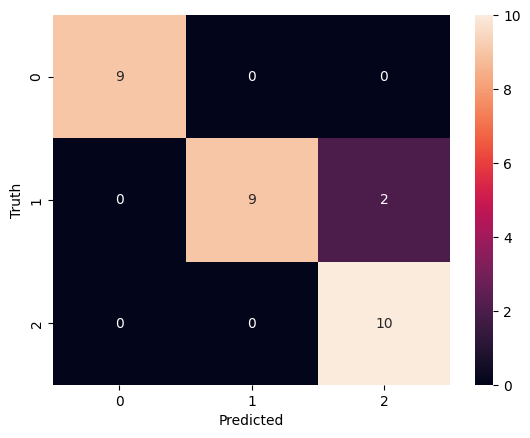

In [73]:
# for better visualisation, we will use seaborn
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(confm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()